# SVM Algorithm
as we know it`s a powerful supervised algorithm that works best on smaller datasets but on complex ones


# Heart attack prediction


###1.Import Libraries:

In [ ]:
!pip install pywaffle

In [ ]:
# import Important Libraries
import numpy as np #used to perform a wide variety of mathematical operations on arrays
import pandas as pd #used for working with data sets
import matplotlib.pyplot as plt #used for data visualization, typically in the form of plots
import seaborn as sns #helps to explore and understand the data.
from sklearn.model_selection import train_test_split #to split the data to train and test
from sklearn.preprocessing import StandardScaler #to normalize and standardize the features before applying machine learning
from sklearn.svm import SVC #Support Vector Classifier is to fit to the data you provide
from sklearn.model_selection import GridSearchCV #tries all the combinations of the values in the dictionary and evaluates the model for each combination using the Cross-Validation method
from sklearn.metrics import classification_report, confusion_matrix

###2.Load the dataset and preprocessing:

In [ ]:
# Load the dataset
df = pd.read_csv("/content/heart.csv")

# Drop missing values
df = df.dropna()

# Replace '?' with NaN and then drop NaN values
df.replace('?', np.nan, inplace=True)
df = df.dropna()

# Define features and target variables
X = df[['age','chol','trtbps','thalachh']] # our features and independent variables
y = df['output'] # the target and dependent variables

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #### 2.1.simple visualization of how many people are at risk of having a heart attack:


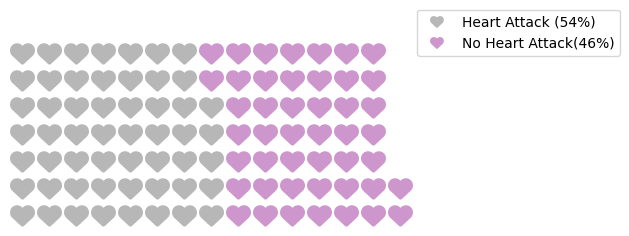

In [ ]:
from pywaffle import Waffle

heart_disease = df['output'].value_counts().values[0]
heart_disease_no = df['output'].value_counts().values[1]

no_percent = int(round(heart_disease_no/(heart_disease+heart_disease_no) * 100, 0))
yes_percent = int(round(heart_disease/(heart_disease+heart_disease_no)* 100, 0))

fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values={'Heart Attack ({}%)'.format(yes_percent): yes_percent, 'No Heart Attack({}%)'.format(no_percent): no_percent},
    colors=["#B7B7B7", "#CD96CD"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1.2)},
    icons='heart',
    font_size=18,
    icon_legend=True
)
plt.show()

####2.2.Density plot:

A density plot is used to visualize the distribution of a continuous variable. In this case, it is used to show the distribution of the data points for the two classes in the dataset - "Normal" and "Heart Attack". This can help us understand the patterns and differences between the two classes.

In [ ]:
def plot_dense_chart(df, name, title):
    keeps = [name, 'output']
    frame = df[keeps]

    normal = frame[frame['output'] == 0]
    heart_attack = frame[frame['output'] == 1]

    plt.figure(figsize=(10,6))
    sns.kdeplot(data=normal, x=name, fill=True, label='Normal',color='purple')
    sns.kdeplot(data=heart_attack, x=name, fill=True, label='Heart Attack',color='slategray')

    plt.title(title)
    plt.xlabel(name)
    plt.legend()
    plt.show()

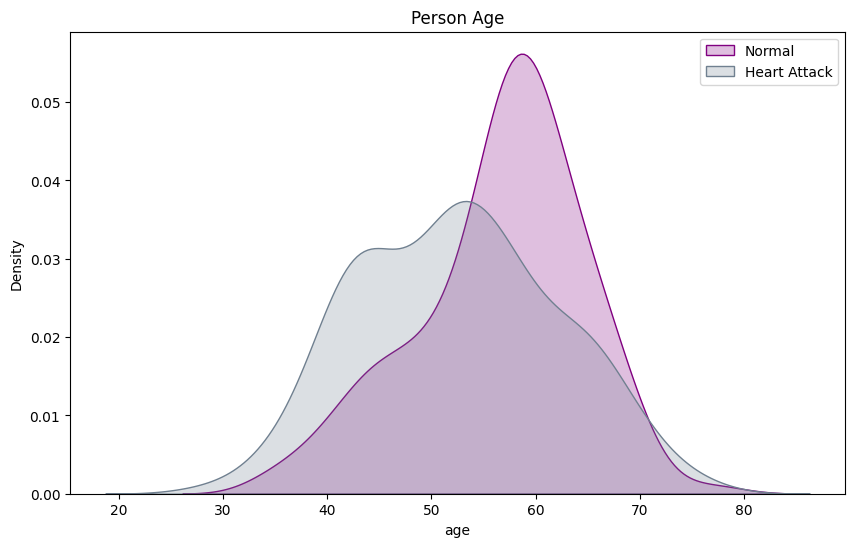

In [ ]:
plot_dense_chart(df, 'age', 'Person Age')

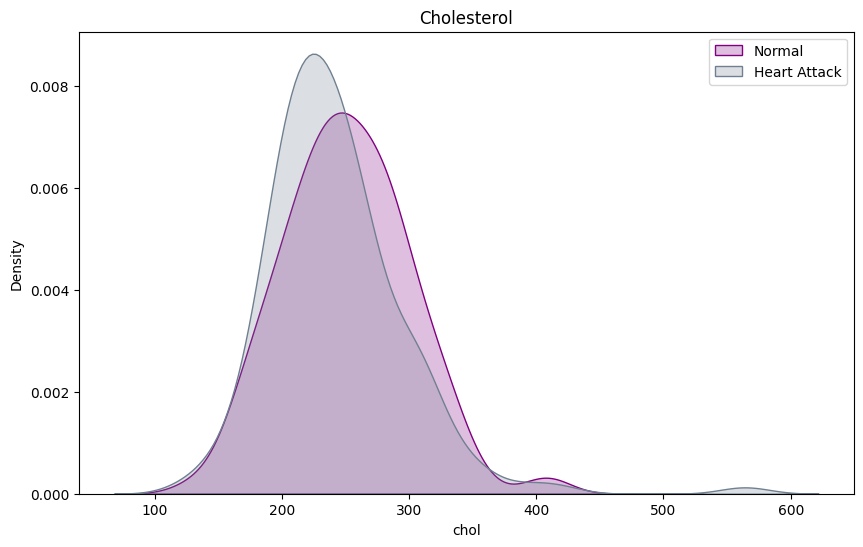

In [ ]:
plot_dense_chart(df, 'chol', 'Cholesterol')

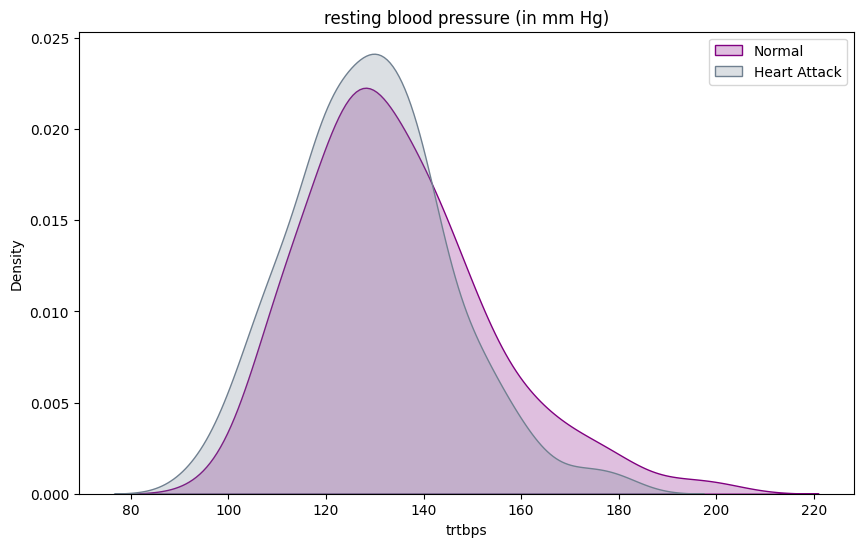

In [ ]:
plot_dense_chart(df, 'trtbps', 'resting blood pressure (in mm Hg)')

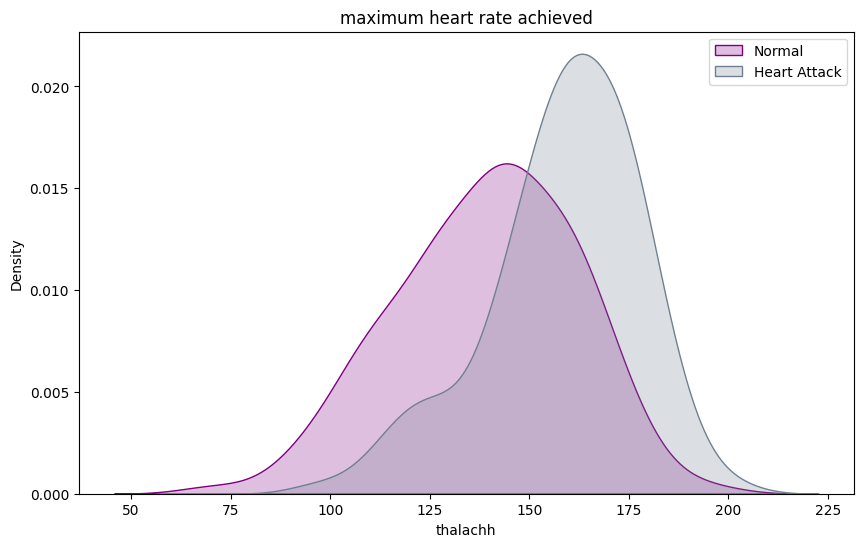

In [ ]:
plot_dense_chart(df, 'thalachh', 'maximum heart rate achieved')

##3.Normalize and standardize

In [ ]:
# to standardize and normalize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##4.Tune the SVM classifier model

In [ ]:
# This code performs a Grid Search for hyperparameter tuning in an SVM classifier.
parameters = {
    'kernel':('linear', 'sigmoid'),
    'C':[1, 10]
}

svm = SVC()

clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)

print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

Best parameters:  {'C': 1, 'kernel': 'linear'}
Best score:  0.6528061224489796


## 5.Prediction:

In [ ]:
# This will return the predicted labels for the test set.
y_pred = clf.predict(X_test)
results = pd.DataFrame(data={'pred':y_pred, 'Actuals':y_test})
results.head()

,pred,Actuals
179,0,0
228,1,0
111,1,1
246,1,0
60,0,1


##6.Evalute the performance

In [ ]:
# This code evaluates the performance of the SVM classifier using the `classification_report` and `confusion_matrix` functions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.76      0.78      0.77        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

[[21  8]
 [ 7 25]]


<Axes: >

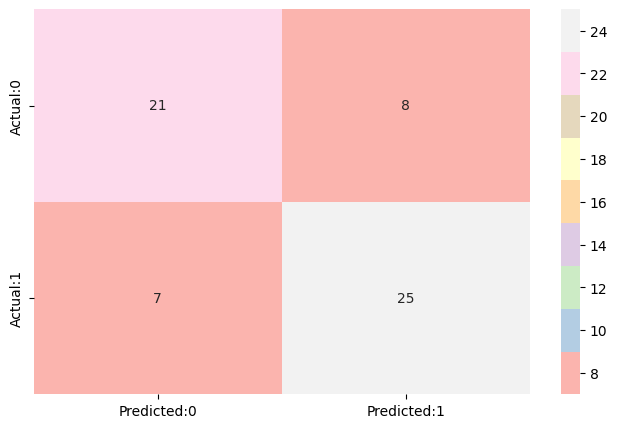

In [ ]:
#This code generates a heatmap of the confusion matrix, making it easier to visualize the classifier's performance.
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel1")

## Now there is an examination of the model by testing it with new different inputs

In [ ]:
new_data = pd.DataFrame({'age': [44], 'chol': [500],'trtbps':[150],'thalachh':[190]})
new_data = scaler.transform(new_data)
prediction = clf.predict(new_data)
print(prediction)

[1]


In [ ]:
new_data = pd.DataFrame({'age': [15], 'chol': [500],'trtbps':[60],'thalachh':[98]})
new_data = scaler.transform(new_data)
prediction = clf.predict(new_data)
print(prediction)

[0]
